## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [19]:
import numpy as np

def lancio(sampleSize: int) -> None:
    # Genera tutti i lanci in una volta sola: 0 = croce, 1 = testa
    lanci = np.random.randint(0, 2, sampleSize)
    
    # Calcola la percentuale di "testa" (1)
    y = np.sum(lanci) / sampleSize * 100
    
    print(f"Abbiamo eseguito il lancio {sampleSize} volte, ottenendo testa {y}% delle volte.")

# Esempio
lancio(100)

Abbiamo eseguito il lancio 100 volte, ottenendo testa 52.0% delle volte.


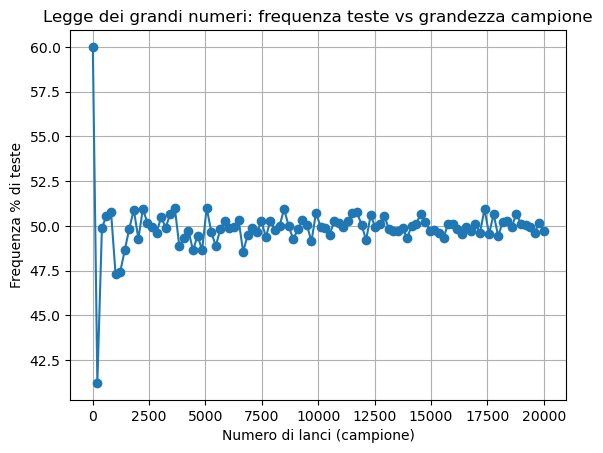

In [13]:
#- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
import numpy as np
import matplotlib.pyplot as plt

def lancio(sampleSize: int) -> float:
    lanci = np.random.randint(0, 2, sampleSize)
    return np.sum(lanci) / sampleSize * 100  # percentuale di teste

# Genera 100 sampleSize da 10 a 20000 (spaziati uniformemente)
sample_sizes = np.linspace(10, 20000, 100, dtype=int)
frequenze_teste = [lancio(n) for n in sample_sizes]

# Plot della frequenza di teste rispetto alla grandezza del campione
plt.plot(sample_sizes, frequenze_teste, marker='o', linestyle='-')
plt.xlabel('Numero di lanci (campione)')
plt.ylabel('Frequenza % di teste')
plt.title('Legge dei grandi numeri: frequenza teste vs grandezza campione')
plt.grid(True)

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

numero righe df = 891
numero col df = 12
 numero di na 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Numero di righe duplicate: 0
età media per classe 
 Pclass
1    38.233441
2    29.877630
3    25.140620


Text(0, 0.5, 'Età')

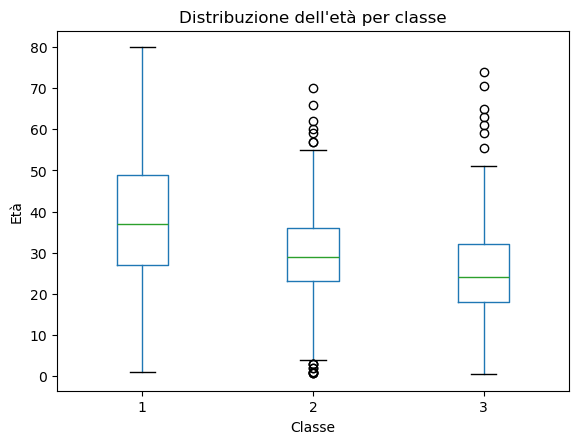

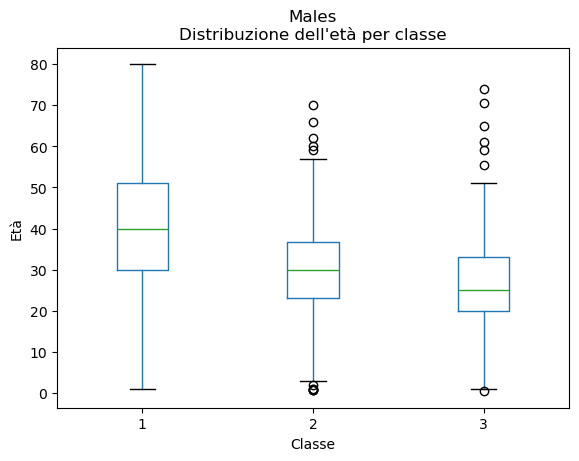

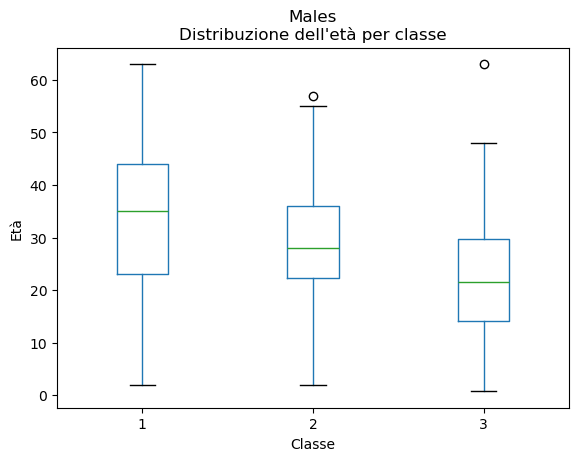

In [19]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url ,)
#df.head()
#df.info()
print('numero righe df = '+str(df.shape[0]))
print('numero col df = '+str(df.shape[1]))
# Count NaNs per column
na_counts = df.isna().sum() #sum somma per colonne 
print(f' numero di na \n {na_counts}')
# Sostituisce i valori mancanti (NaN) nella colonna 'Embarked' con il valore più frequente (moda) della stessa colonna
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Rimuove tutte le righe del DataFrame dove il valore della colonna 'Age' è mancante (NaN)
df = df.dropna(subset=['Age'])
duplicate_rows = df.duplicated().sum()
print(f"Numero di righe duplicate: {duplicate_rows}")
#controllo valori manacanti peso e metto il piu frequente
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
#media dei passeggeri per ogni classe 
eta_media_classe = df.groupby('Pclass')['Age'].mean()
print(f'età media per classe \n {eta_media_classe.to_string()}')

# Visualizza la distribuzione dell'età per classe (Pclass) con boxplot
df.boxplot(column='Age', by='Pclass', grid=False)
plt.title('Distribuzione dell\'età per classe')
plt.suptitle('')  # Rimuove il titolo automatico di pandas
plt.xlabel('Classe')
plt.ylabel('Età') 
#divisione per sesso
#maschi 
df[df['Sex']=='male'].boxplot(column='Age', by='Pclass', grid=False)
plt.title('Distribuzione dell\'età per classe')
plt.suptitle('Males')  # Rimuove il titolo automatico di pandas
plt.xlabel('Classe')
plt.ylabel('Età')

#femmine 
df[df['Sex']=='female'].boxplot(column='Age', by='Pclass', grid=False)
plt.title('Distribuzione dell\'età per classe')
plt.suptitle('Males')  # Rimuove il titolo automatico di pandas
plt.xlabel('Classe')
plt.ylabel('Età')


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

campioni per specie species
setosa        50
versicolor    50
virginica     50

lunghezza media petalo: species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


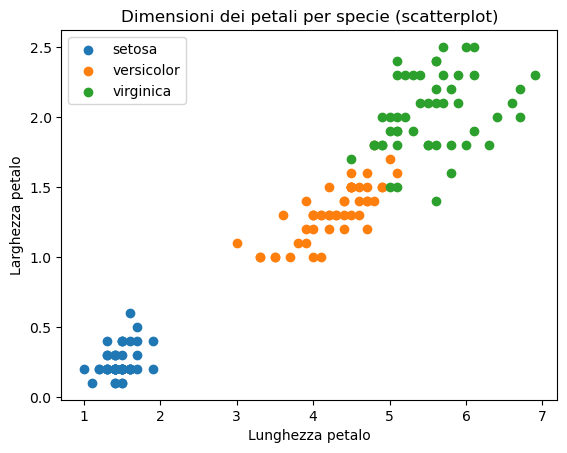

Text(0, 0.5, 'specie')

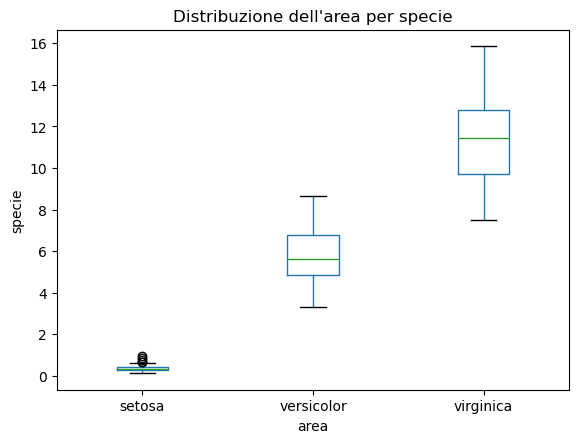

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
#df.head()
campioni_specie = df['species'].value_counts()
print('campioni per specie '+ campioni_specie.to_string())
# Calcola la lunghezza media del petalo per ogni specie
lunghezza_media_petalo = df.groupby('species')['petal_length'].mean()
print(f'\nlunghezza media petalo: {lunghezza_media_petalo}')

#scatter plot lunghezza petalo per specie 

for specie in df['species'].unique():
    subset=df[df['species']==specie]
    plt.scatter(subset['petal_length'], subset['petal_width'], label=specie)  # Crea lo scatterplot per quella specie

plt.xlabel('Lunghezza petalo')
plt.ylabel('Larghezza petalo')
plt.title('Dimensioni dei petali per specie (scatterplot)')
plt.legend()
plt.show()

#aggiungo una nuova colonna per l'area da analizzare 
#options=['Area1','Area2','Area3']
#df['petal_area']= [random.choice(options) for _ in df.iterrows()] 
df['petal_area'] = df['petal_length'] * df['petal_width'] #pandas itera automaticamente 
#boxplot area e specie 
df.boxplot(column='petal_area', by='species', grid=False)
plt.title('Distribuzione dell\'area per specie')
plt.suptitle('')  # Rimuove il titolo automatico di pandas
plt.xlabel('area')
plt.ylabel('specie') 